In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import svm, metrics, preprocessing #機械学習用のライブラリを利用
import sklearn.model_selection as cross_validation
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

In [2]:
# 2：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


<function matplotlib.pyplot.show>

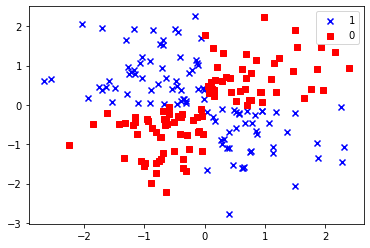

In [3]:
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show
 

In [4]:
# 4：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

In [6]:
# 解説5：機械学習で分類する---------------------------------------------------
# カーネルの種類としてはrbfカーネル（ガウスカーネル）を使用します。
# ガウスカーネルの係数gammaはdefaultでは1/次元数であり、今回は1/2としています。
clf_result=svm.SVC(kernel='rbf', gamma=1/2, C=1.0, class_weight="balanced", random_state=0) #loss='squared_hinge' #loss="hinge", loss="log"
clf_result.fit(X_std, z)

SVC(class_weight='balanced', gamma=0.5, random_state=0)

In [9]:
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.9400000000000001
正解率の標準偏差 =  0.048989794855663564


In [15]:
# 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_std, z, random_state=0)
clf_result.fit(X_train, y_train)
score = clf_result.score(X_test, y_test)
print("正答率 = ",score)

正答率 =  0.98


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


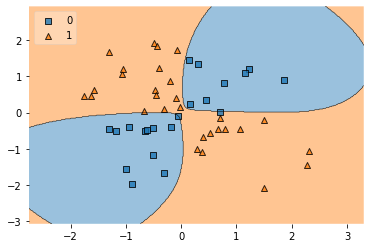

In [21]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(y_train)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(y_test)
# plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット
 

In [18]:
# 8：任意のデータに対する識別結果を見てみる------------------
#predicted_label=clf_result.predict([1.0,-1.0])
#print("このテストデータのラベル = ", predicted_label)

In [19]:
# 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.dual_coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[0.20125157]
[[-0.96153846 -0.96153846 -0.96153846 -0.96153846 -0.96153846 -0.96153846
  -0.96153846 -0.96153846 -0.96153846 -0.72282637 -0.96153846 -0.96153846
  -0.96153846 -0.07745821 -0.96153846 -0.96153846 -0.69294488 -0.96153846
  -0.96153846 -0.96153846 -0.96153846 -0.96153846 -0.96153846 -0.63505171
  -0.96153846 -0.96153846 -0.96153846 -0.96153846 -0.96153846 -0.96153846
  -0.96153846 -0.7689468  -0.96153846 -0.07358411 -0.96153846 -0.96153846
  -0.96153846 -0.96153846 -0.96153846 -0.96153846  1.04166667  1.04166667
   1.04166667  0.04458936  1.04166667  1.04166667  1.04166667  1.04166667
   1.04166667  1.04166667  1.04166667  1.04166667  1.04166667  1.04166667
   0.14534162  1.04166667  1.04166667  1.04166667  0.87554979  1.04166667
   1.04166667  0.22263901  1.04166667  1.04166667  1.04166667  1.04166667
   1.04166667  1.04166667  1.04166667  1.04166667  1.04166667  1.04166667
   1.04166667  1.04166667  1.04166667  1.04166667  1.04166667]]
